# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [120]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

## 1.1 Reading Data

In [121]:
project_data = pd.read_csv('train_data.csv',nrows=10000)
resource_data = pd.read_csv('resources.csv')

## Adding price attribute to project_data dataframe from resources using merge function

In [122]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [123]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (10000, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [124]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [125]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [126]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [127]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [128]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [129]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

IndexError: index 20000 is out of bounds for axis 0 with size 10000

In [130]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [131]:
sent = decontracted(project_data['essay'].values[5000])
print(sent)
print("="*50)

My class is made up of students from various grade levels. We  work hard in filling learning gaps and have students reach grade level. My students are dealing with emotional issues that make it hard for them to handle frustration with tasks and need a lot of individual attention. By learning to work independently, my students will have the chance to mainstream into other classrooms with their peer groups. Our biggest goal with my students is for them to learn not only to control their emotions but to learn how to be students. Many of them have spent a large amount of time absent from school for different reasons and need to get into the routine of being in class and on task all day. Modeling good classroom routines and task is important for them to master and move back into general education classrooms. Being apart of a Title 1 school means resources that students need are massive and a lot of supplies are shared with parents to make sure homework is completed.Bouncy Bands will give my

In [132]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My class is made up of students from various grade levels. We  work hard in filling learning gaps and have students reach grade level. My students are dealing with emotional issues that make it hard for them to handle frustration with tasks and need a lot of individual attention. By learning to work independently, my students will have the chance to mainstream into other classrooms with their peer groups. Our biggest goal with my students is for them to learn not only to control their emotions but to learn how to be students. Many of them have spent a large amount of time absent from school for different reasons and need to get into the routine of being in class and on task all day. Modeling good classroom routines and task is important for them to master and move back into general education classrooms. Being apart of a Title 1 school means resources that students need are massive and a lot of supplies are shared with parents to make sure homework is completed.Bouncy Bands will give my

In [133]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My class is made up of students from various grade levels We work hard in filling learning gaps and have students reach grade level My students are dealing with emotional issues that make it hard for them to handle frustration with tasks and need a lot of individual attention By learning to work independently my students will have the chance to mainstream into other classrooms with their peer groups Our biggest goal with my students is for them to learn not only to control their emotions but to learn how to be students Many of them have spent a large amount of time absent from school for different reasons and need to get into the routine of being in class and on task all day Modeling good classroom routines and task is important for them to master and move back into general education classrooms Being apart of a Title 1 school means resources that students need are massive and a lot of supplies are shared with parents to make sure homework is completed Bouncy Bands will give my students

In [134]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"}

In [135]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = sentance.lower().strip()
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    preprocessed_essays.append(sent)
    

100%|██████████| 10000/10000 [00:01<00:00, 7294.97it/s]


In [136]:
# after preprocesing
preprocessed_essays[5000]

'class made students various grade levels work hard filling learning gaps students reach grade level students dealing emotional issues make hard handle frustration tasks need lot individual attention learning work independently students chance mainstream classrooms peer groups biggest goal students learn not control emotions learn students many spent large amount time absent school different reasons need get routine class task day modeling good classroom routines task important master move back general education classrooms apart title 1 school means resources students need massive lot supplies shared parents make sure homework completed bouncy bands give students way get rid anxiety tension energy staying desk working independently students use bands either desk whole group table chair avoid get asked stop moving movement key keeping students adhd disabilities focused finishing assignments staying task teacher teaching goal help students learn helpful strategies allow join peers genera

In [137]:
project_data['clean_essay'] = preprocessed_essays

In [138]:
project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'],axis=1,inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

* Decontract project titles, remove line breaks and extra spaces, convert everything to lowercase and then remove all the stop words.

In [139]:
preprocessed_titles = []

for title in tqdm(project_data['project_title'].values):
    title = title.lower().strip()
    title = ' '.join(e for e in title.split() if e.lower() not in stopwords)
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    preprocessed_titles.append(title)

100%|██████████| 10000/10000 [00:00<00:00, 65255.50it/s]


In [140]:
project_data['clean_title'] = preprocessed_titles
project_data.drop(['project_title'],axis=1,inplace=True)

## Pre-processing teacher_prefix

In [141]:
#remove nan from teacher prefix:
#https://stackoverflow.com/questions/21011777/how-can-i-remove-nan-from-list-python-numpy
def remove_nan(prefix):
    if str(prefix)!='nan':
        pr = str(prefix)
        pr = re.sub("\\.","",pr) #remove dot from the end of prefix
        return pr
    return "none"

cleaned_teacher_prefix = project_data['teacher_prefix'].map(remove_nan)
project_data['clean_teacher_prefix'] = cleaned_teacher_prefix

In [142]:
project_data.drop(['teacher_prefix'],axis=1,inplace=True)

## Pre-process project_grade_category

* Clean the project grade categories: 
    * Convert     `Grades 3-5 ==> Grades_3_5`

In [143]:
def clean_project_grades(grade):
    grade = re.sub("\-","_",grade)
    grade = re.sub(" ","_",grade)
    return grade.strip()

clean_grades = project_data['project_grade_category'].map(clean_project_grades)
project_data['clean_grade_category'] = clean_grades

In [144]:
project_data.drop(['project_grade_category'],axis=1,inplace=True)

In [145]:
# Dropping all features we won't need going forward
project_data.drop(['project_resource_summary'],axis=1,inplace=True)
project_data.drop(['Unnamed: 0','teacher_id'],axis=1,inplace=True)

In [146]:
project_data.head(2)

id school_state project_submitted_datetime  \
0  p253737           IN        2016-12-05 13:43:57   
1  p258326           FL        2016-10-25 09:22:10   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                         clean_essay  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                                 clean_title clean_teacher_prefix  \
0  educational support english learners home                  Mrs   
1           wanted projector hungry learners                   Mr   

  clean_grade_category  
0        Grades_PreK_2  
1           Grades_6_8

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Clustering </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [147]:
#Separating features and label column
Y = project_data['project_is_approved']
X = project_data.drop(['project_is_approved','id'],axis=1)
print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (10000, 12)
Shape of Y:  (10000,)


In [148]:
# #separating data into train and test
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,stratify=Y)
# print("Shape of X_train: ", X_train.shape)
# print("Shape of Y_train: ",Y_train.shape)
# print("Shape of X_test: ",X_test.shape)
# print("Shape of Y_test: ",Y_test.shape)

In [149]:
X.columns

Index(['school_state', 'project_submitted_datetime',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'clean_teacher_prefix', 'clean_grade_category'],
      dtype='object')

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

## 2.2.1 Encoding Categorical Features

**One hot encoding: clean_categories**

In [150]:
from collections import Counter
my_counter = Counter()
for word in X['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [151]:
# we use count vectorizer to convert the values into one 
vectorizer_category = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_category.fit(X['clean_categories'].values)

X_category_ohe = vectorizer_category.transform(X['clean_categories'].values)
#X_test_category_ohe = vectorizer_category.transform(X_test['clean_categories'].values)

In [152]:
print(vectorizer_category.get_feature_names())
print("Shape of X after one hot encodig ",X_category_ohe.shape)
#print("Shape of X_test after one hot encodig ",X_test_category_ohe.shape)
print("Print some random encoded categories: ")
print(X_category_ohe[0].toarray())
#print(X_test_category_ohe[15].toarray())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of X after one hot encodig  (10000, 9)
Print some random encoded categories: 
[[0 0 0 0 0 0 0 0 1]]


**One hot encoding: clean_subcategories**

In [153]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [154]:
# we use count vectorizer to convert the values into one 
vectorizer_subcategory = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategory.fit(X['clean_subcategories'].values)

X_subcategory_ohe = vectorizer_subcategory.transform(X['clean_subcategories'].values)
X_subcategory_ohe = vectorizer_subcategory.transform(X['clean_subcategories'].values)

In [155]:
print(vectorizer_subcategory.get_feature_names())
print("Shape of X subcategory after one hot encodig ",X_subcategory_ohe.shape)
#print("Shape of X_test subcategory after one hot encodig ",X_test_subcategory_ohe.shape)
print("Print some random encoded categories: ")
print(X_subcategory_ohe[0].toarray())
#print(X_test_subcategory_ohe[10].toarray())

['Economics', 'FinancialLiteracy', 'CommunityService', 'ForeignLanguages', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of X subcategory after one hot encodig  (10000, 30)
Print some random encoded categories: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]]


**One hot encoding: school_state**

In [156]:
# create a vocabulary for states
unique_states = np.unique(X['school_state'].values)

vectorizer_state = CountVectorizer(vocabulary=unique_states,lowercase=False,binary=True)
vectorizer_state.fit(X['school_state'].values)

X_school_state_ohe = vectorizer_state.transform(X['school_state'].values)
X_school_state_ohe = vectorizer_state.transform(X['school_state'].values)

In [157]:
print(vectorizer_state.get_feature_names())
print("Shape of X school_state after one hot encodig ",X_school_state_ohe.shape)
print("Shape of X school_state after one hot encodig ",X_school_state_ohe.shape)
print("Print some random encoded school_state: ")
print(X_school_state_ohe[0].toarray())
print(X_school_state_ohe[15].toarray())

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of X school_state after one hot encodig  (10000, 51)
Shape of X school_state after one hot encodig  (10000, 51)
Print some random encoded school_state: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


**One hot encoding: teacher_prefix**

In [158]:
unique_teacher_prefix = np.unique(X['clean_teacher_prefix'])

vectorizer_teacher_prefix = CountVectorizer(vocabulary=unique_teacher_prefix,lowercase=False,binary=True)
vectorizer_teacher_prefix.fit(X['clean_teacher_prefix'].values)

X_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X['clean_teacher_prefix'].values)
#X_test_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X['clean_teacher_prefix'].values)

In [159]:
print(vectorizer_teacher_prefix.get_feature_names())
print("Shape of X clean_teacher_prefix after one hot encodig ",X_teacher_prefix_ohe.shape)
#print("Shape of X_test clean_teacher_prefix after one hot encodig ",X_test_teacher_prefix_ohe.shape)
print("Print some random encoded clean_teacher_prefix: ")
print(X_teacher_prefix_ohe[0].toarray())
#print(X_test_teacher_prefix_ohe[15].toarray())

['Mr', 'Mrs', 'Ms', 'Teacher', 'none']
Shape of X clean_teacher_prefix after one hot encodig  (10000, 5)
Print some random encoded clean_teacher_prefix: 
[[0 1 0 0 0]]


**One hot encoding: project_grade_category**

In [160]:
unique_grades = np.unique(X['clean_grade_category'])

vectorizer_grade = CountVectorizer(vocabulary=unique_grades,lowercase=False,binary=True)
vectorizer_grade.fit(X['clean_grade_category'].values)


X_grade_category_ohe = vectorizer_grade.transform(X['clean_grade_category'].values)
#X_test_grade_category_ohe = vectorizer_grade.transform(X_test['clean_grade_category'].values)

In [161]:
print(vectorizer_grade.get_feature_names())
print("Shape of X_train clean_grade_category after one hot encodig ",X_grade_category_ohe.shape)
#print("Shape of X_test clean_grade_category after one hot encodig ",X_test_grade_category_ohe.shape)
print("Print some random encoded clean_grade_category: ")
print(X_grade_category_ohe[0].toarray())
#print(X_test_grade_category_ohe[15].toarray())

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of X_train clean_grade_category after one hot encodig  (10000, 4)
Print some random encoded clean_grade_category: 
[[0 0 0 1]]


## 2.2.2 Encoding Numerical features

**Normalizing Price**

In [162]:
price_vectorizer = preprocessing.Normalizer().fit(X['price'].values.reshape(1,-1))

In [163]:
X_price_normalized = price_vectorizer.transform(X['price'].values.reshape(1,-1))
#X_test_price_normalized = price_vectorizer.transform(X_test['price'].values.reshape(1, -1))

In [164]:
X_price_normalized

array([[0.00314667, 0.00608573, 0.01051977, ..., 0.00719399, 0.00667599,
        0.00432087]])

**Normalize teacher_number_of_previously_posted_projects**

In [165]:
project_vectorizer = preprocessing.Normalizer().fit(X['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [166]:
X_normal_previous_project = project_vectorizer.transform(X['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
#X_test_normal_previous_project = project_vectorizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### 2.3.5 Using Pretrained Models: Avg W2V : Essay

In [167]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [168]:
# average Word2Vec
def get_avg_w2v(corpus):
    avg_w2v_vectors=[]
    for sentence in tqdm(corpus): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

X_essay_avg_w2v_vectors = get_avg_w2v(X['clean_essay'])
#X_test_essay_avg_w2v_vectors = get_avg_w2v(X_test['clean_essay'])

100%|██████████| 10000/10000 [00:03<00:00, 3065.12it/s]


In [169]:
print("Shape of X_essay_avg_w2v_vectors",len(X_essay_avg_w2v_vectors),len(X_essay_avg_w2v_vectors[0]))
#print("Shape of X_test_essay_avg_w2v_vectors ",len(X_test_essay_avg_w2v_vectors),len(X_test_essay_avg_w2v_vectors[0]))

Shape of X_essay_avg_w2v_vectors 10000 300


#### 2.3.6 Using Pretrained Models: Avg W2V : Project Title

In [170]:
X_title_avg_w2v_vectors = get_avg_w2v(X['clean_title'])
#X_test_title_avg_w2v_vectors = get_avg_w2v(X_test['clean_title'])

100%|██████████| 10000/10000 [00:00<00:00, 55494.97it/s]


<h2>2.4 Choose the best data matrix on which you got the best AUC</h2>

### - Choosing Word2Vec Embedding for text data and one hot encoding for the categorical features

### - Selecting top 5000 features with SelectKBest

### NOTE: SelectKBest uses chi squared test which assumes a frequency distribution and frequency distribution cannot be negative

**Hence, Normalizing price and number_of_previously_submitted_projects.**

In [171]:
from sklearn import preprocessing
#Use minmax scalar
mm_scaler = preprocessing.MinMaxScaler()
#Apply transform, this is equivalent to X = X-min(X)/Max(X)-Min(X)
X_price_normalized = mm_scaler.fit_transform(X['price'].values.reshape(-1,1))
#X_test_price_normalized = mm_scaler.fit_transform(X_test['price'].values.reshape(-1,1))

X_previous_project_normalized = mm_scaler.fit_transform(X['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_test_previous_project_normalized = mm_scaler.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [172]:
f1 = X_school_state_ohe
f2 = X_category_ohe
f3 = X_subcategory_ohe
f4 = X_grade_category_ohe
f5 = X_teacher_prefix_ohe
f6 = np.array(X_price_normalized).reshape(-1,1)
f7 = np.array(X_normal_previous_project).reshape(-1,1)

X_w2v = hstack((f1,f2,f3,f4,f5,f6,f7,X_essay_avg_w2v_vectors,X_title_avg_w2v_vectors))
X_w2v.shape

(10000, 701)

<h1> Applying K-Means Clustering </h1>

**Hyperparameter Tuning: Finding K using elbow-knee method**

In [54]:
from sklearn.cluster import KMeans
def computeLossForClusterCenters(number_of_centers,data):
    loss = []
    for k in tqdm(number_of_centers):
        kmeans = KMeans(n_clusters=k, random_state=0, n_jobs=-1)
        kmeans.fit(data)
        loss.append(kmeans.inertia_)
    return loss

def plotGraph(number_of_centers, loss):
    plt.plot(number_of_centers, loss)
    
    plt.title("Find best K using elbow-knee method")
    plt.xlabel('number of clusters (K)')
    plt.ylabel('loss')
    plt.legend()

100%|██████████| 4/4 [2:53:01<00:00, 2634.61s/it]
No handles with labels found to put in legend.


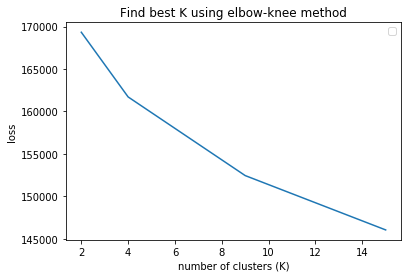

In [55]:
number_of_centers = [2, 4, 9, 15]
loss = computeLossForClusterCenters(number_of_centers,X_w2v)
plotGraph(number_of_centers,loss)

**Clustering data with the best value of K= 9**

In [56]:
kmeans = KMeans(n_clusters=9, random_state=0, n_jobs=-1)
kmeans.fit(X_w2v)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [57]:
kmeans.labels_

array([5, 7, 7, ..., 4, 1, 6], dtype=int32)

**Generating word cloud for each cluster**

In [177]:
def generate_word_cloud(data,allocated_clusters):
    cluster_essay = {}
    df = data.reset_index(drop=True)
    df['allocated_cluster'] = np.array(allocated_clusters)
    cluster_centers = np.unique(allocated_clusters)
    for k in cluster_centers:
        cluster_df = df.loc[(df['allocated_cluster']==k)]
        unique_string=(" ").join(cluster_df['clean_essay'].values)
        cluster_essay[k] = unique_string
    
    for k, essay in cluster_essay.items():
        wordcloud = WordCloud(width = 1000, height = 500).generate(essay)
        plt.figure(figsize=(25,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title('The word cloud with essay text for cluster no. %s'%(k))
        plt.show()
        plt.close()
    return cluster_essay

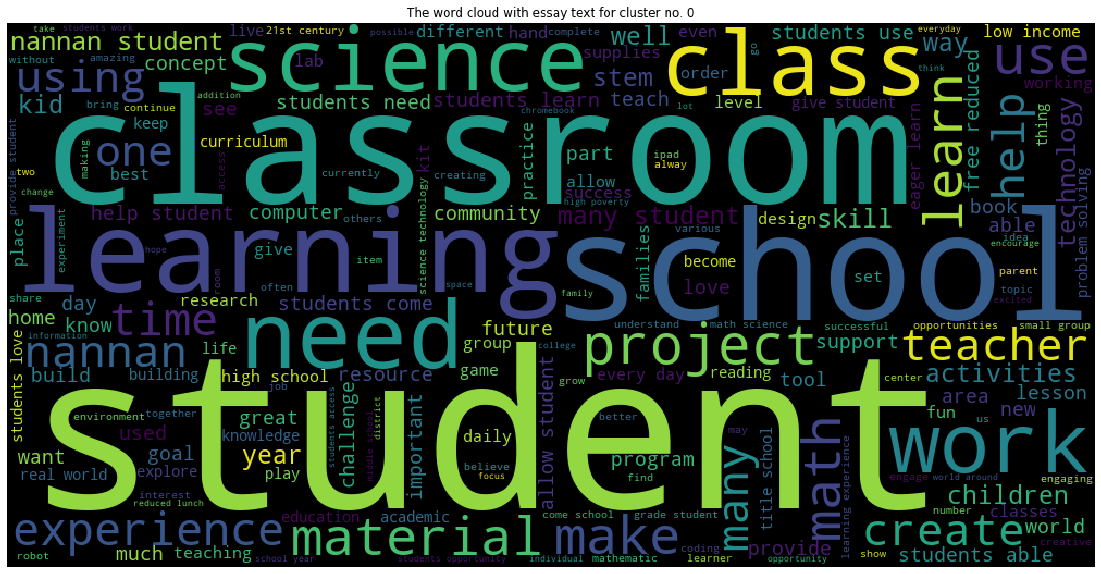

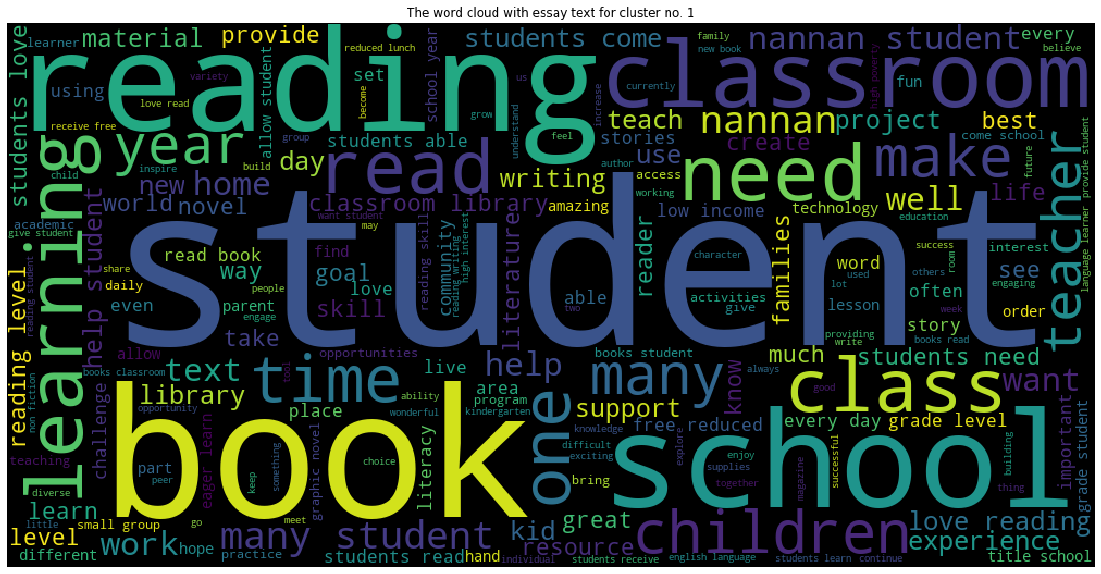

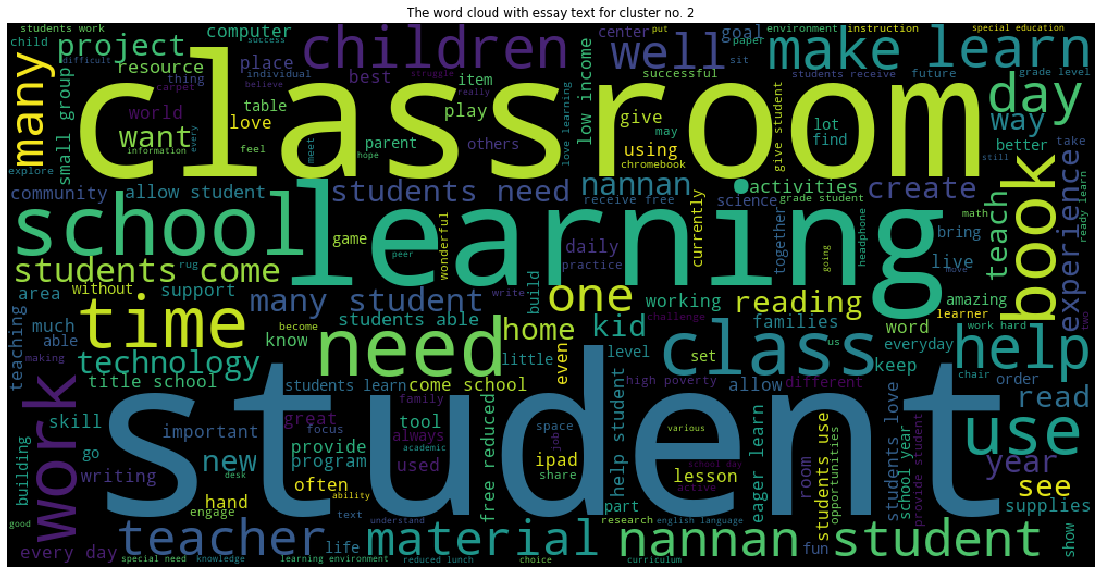

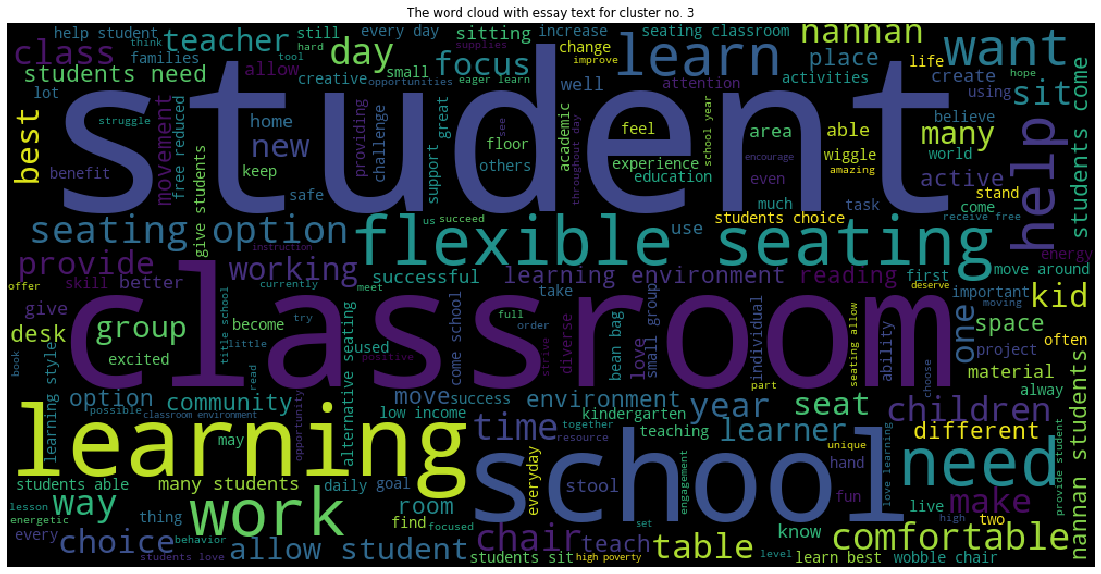

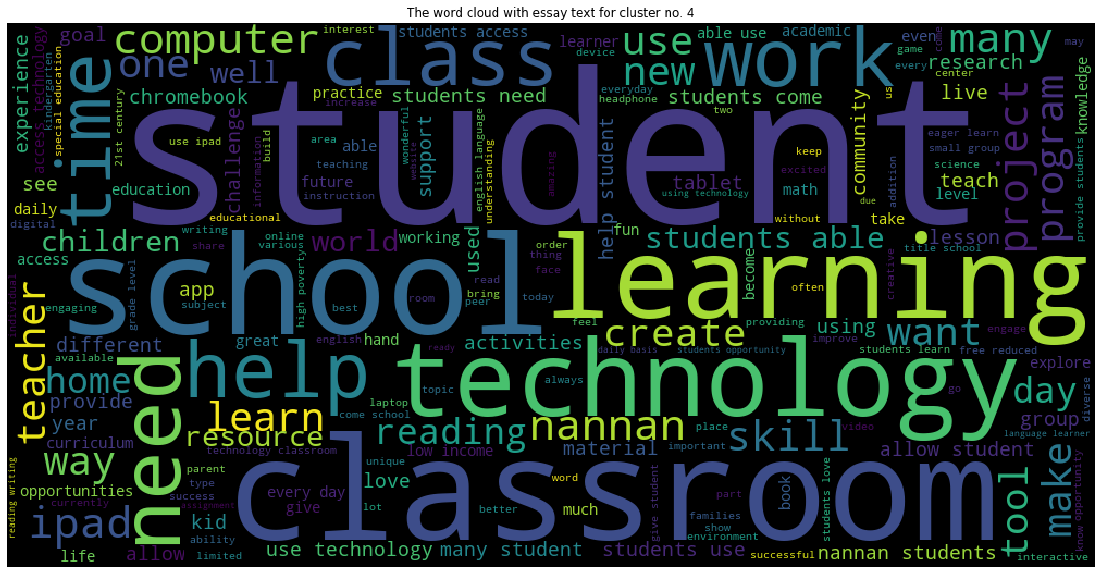

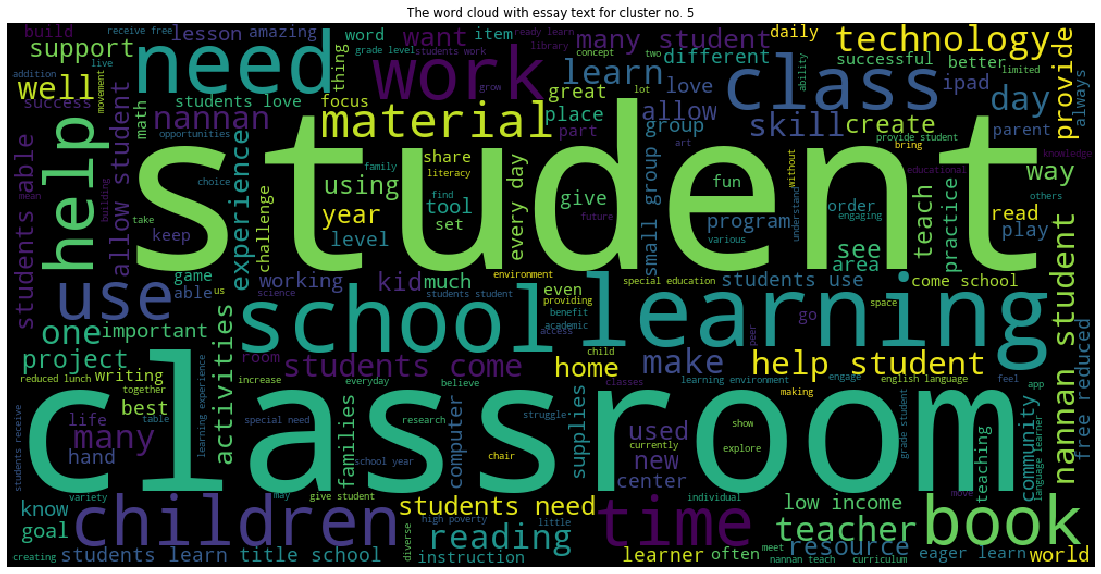

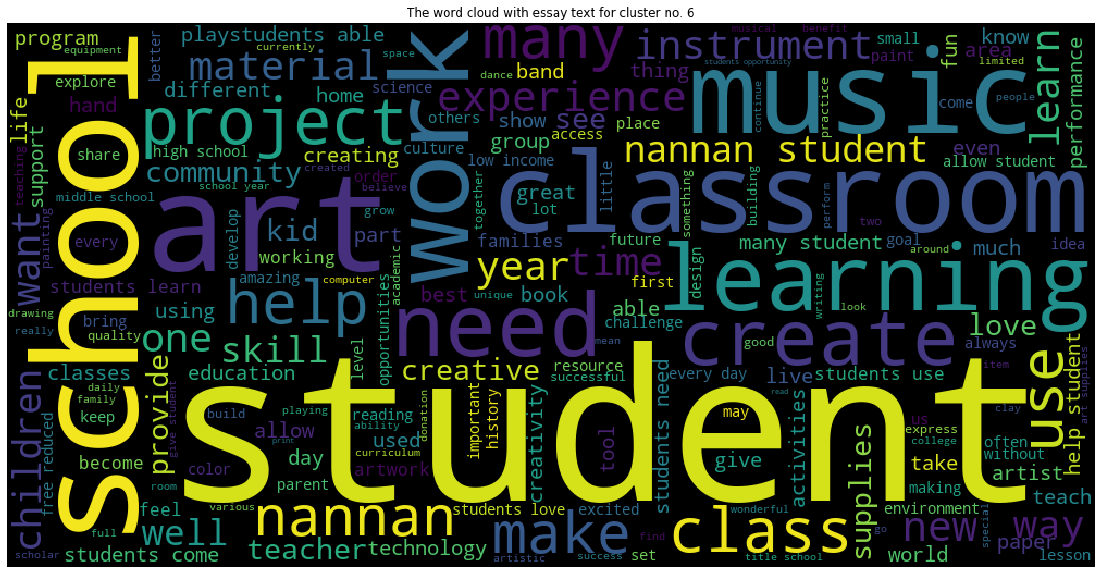

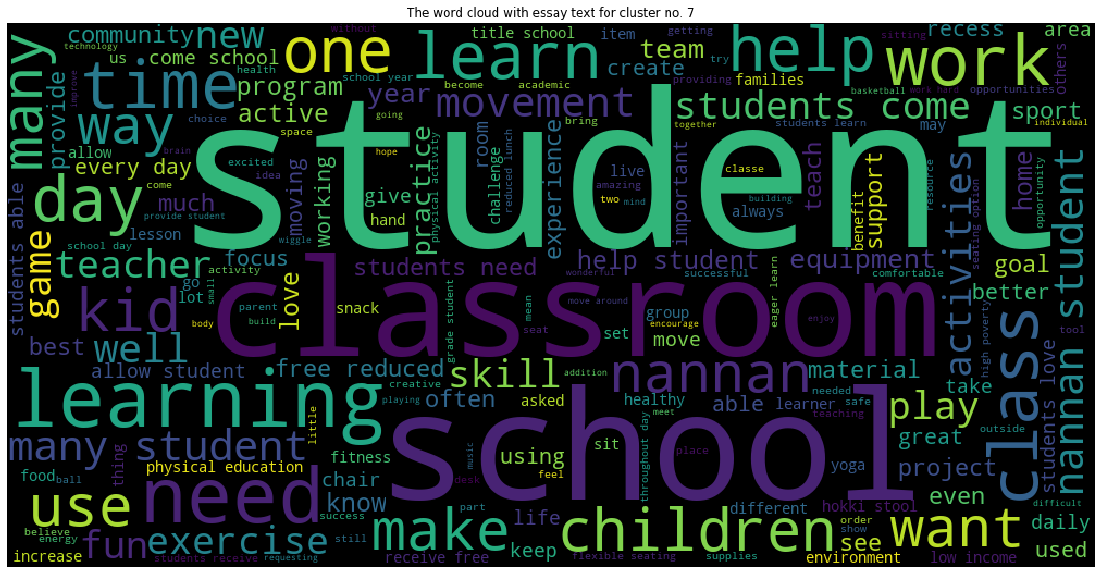

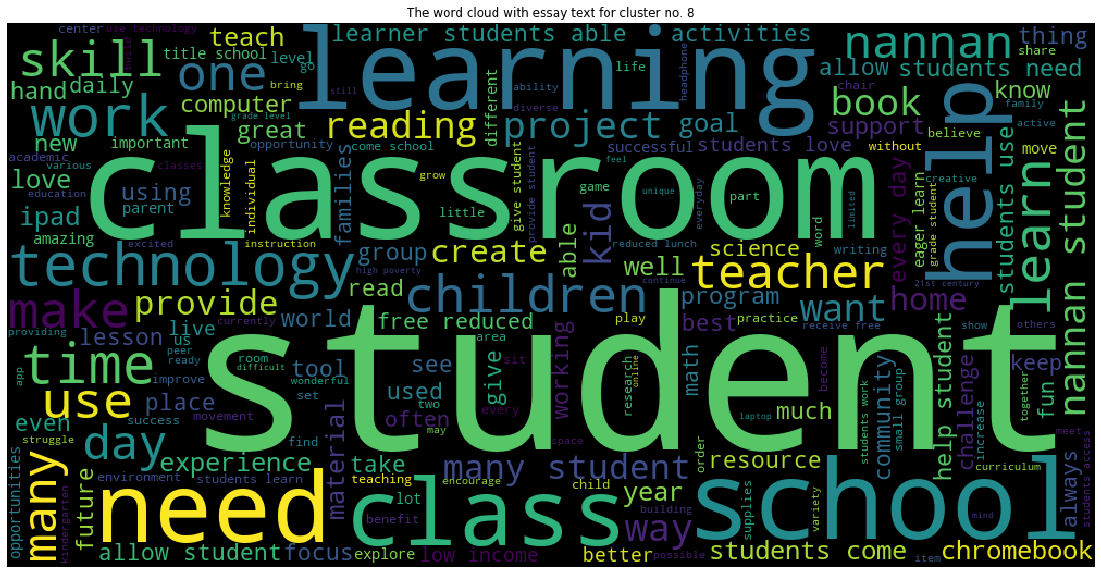

In [97]:
cluster_essays = generate_word_cloud(X,kmeans.labels_)

In [102]:
a = "my name is neeraj"
list(Counter(a.split()).items())

[('my', 1), ('name', 1), ('is', 1), ('neeraj', 1)]

**Observations**

In [180]:
from prettytable import PrettyTable
from collections import Counter
def print_obervations(clusterEssays):
    table = PrettyTable()
    table.field_names = ["Cluster No", "No. of words in cluster", "Most frequent words"]

    for key, ess in clusterEssays.items():
        word_freq_list = list(Counter(ess.split()).items())
        freq_dict = dict(sorted(word_freq_list, key=lambda x: x[1], reverse=True))
        table.add_row([key, len(ess.split()), ",".join(list(freq_dict.keys())[:10])])

    print (table) 

In [181]:
print_obervations(cluster_essays)

+------------+-------------------------+----------------------------------------------------------------------------+
| Cluster No | No. of words in cluster |                            Most frequent words                             |
+------------+-------------------------+----------------------------------------------------------------------------+
|     0      |          223734         |   students,school,learning,classroom,learn,science,math,help,nannan,many   |
|     1      |          179393         |    students,reading,books,school,read,classroom,love,learning,help,many    |
|     2      |          266104         |     students,school,learning,classroom,learn,help,nannan,many,not,need     |
|     3      |          54867          | students,classroom,learning,seating,school,work,learn,flexible,help,nannan |
|     4      |          69508          |   students,technology,school,classroom,learning,use,learn,help,many,not    |
|     5      |          212953         |     students,sc

<h1>Applying Agglomerative Clustering </h1>

**Taking only 5000 points for agglomerative clustering**

In [173]:
X_agg = X_w2v.todense()[:5000]
X_agg.shape

(5000, 701)

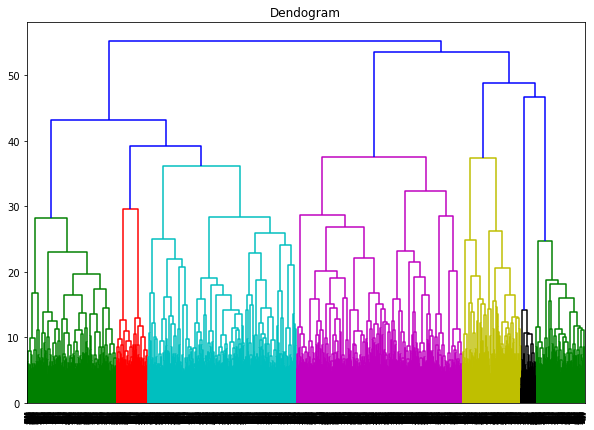

In [108]:
import scipy.cluster.hierarchy as shc
#algo_title = 'Agglomerative Clustering'
plt.figure(figsize=(10, 7))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X_agg, method='ward'))

In [182]:
from sklearn.cluster import AgglomerativeClustering

aggcluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
aggcluster.fit_predict(X_agg)

array([2, 0, 3, ..., 0, 0, 3])

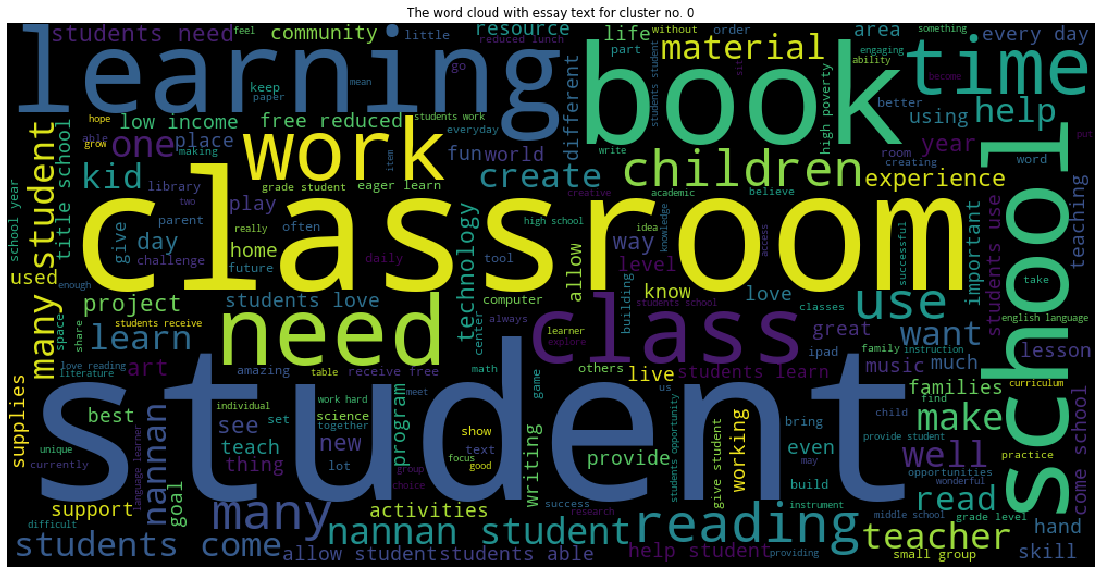

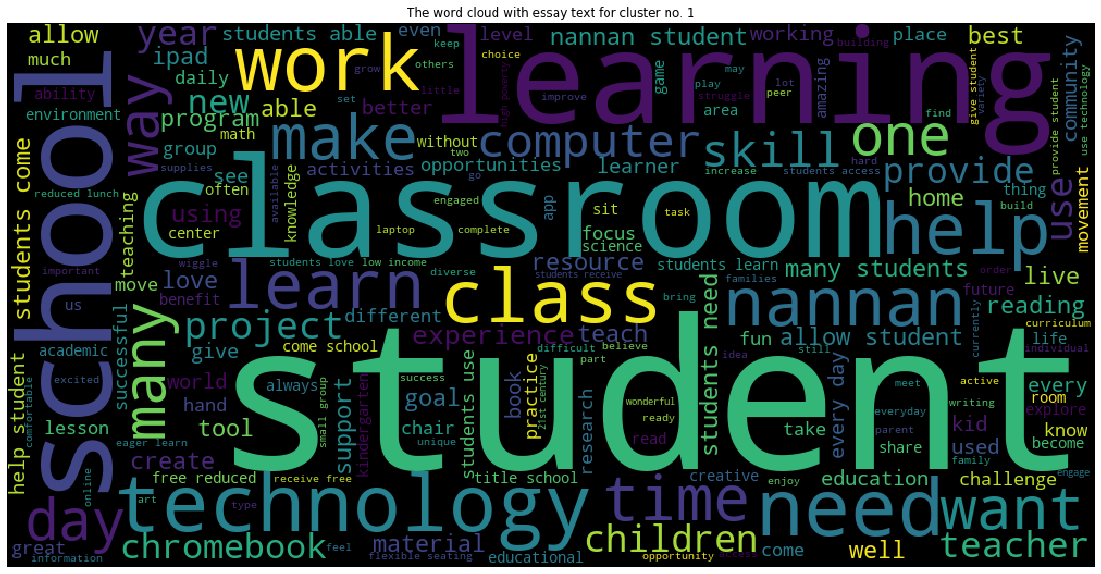

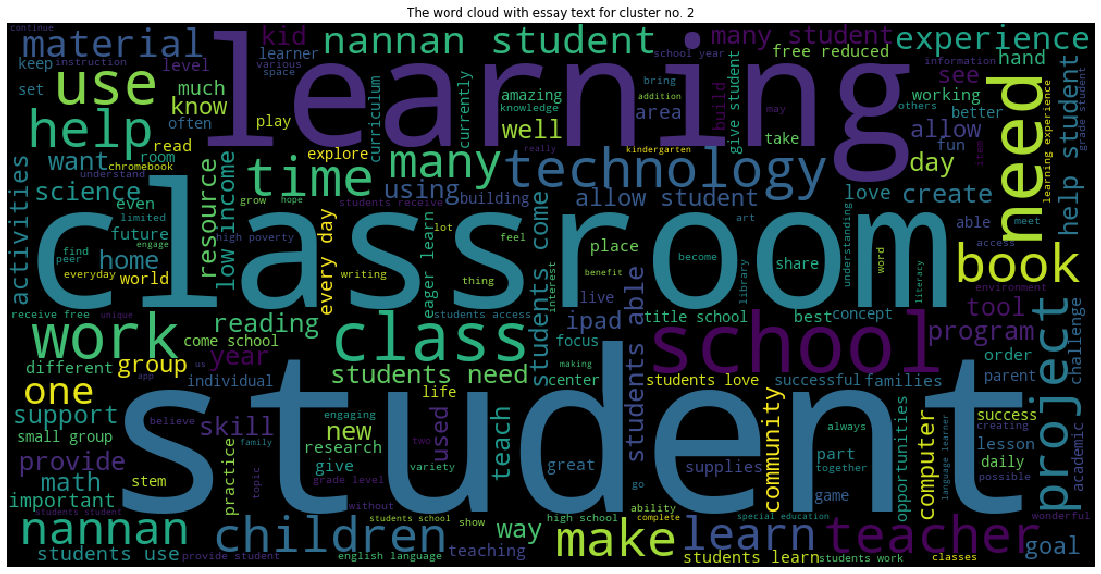

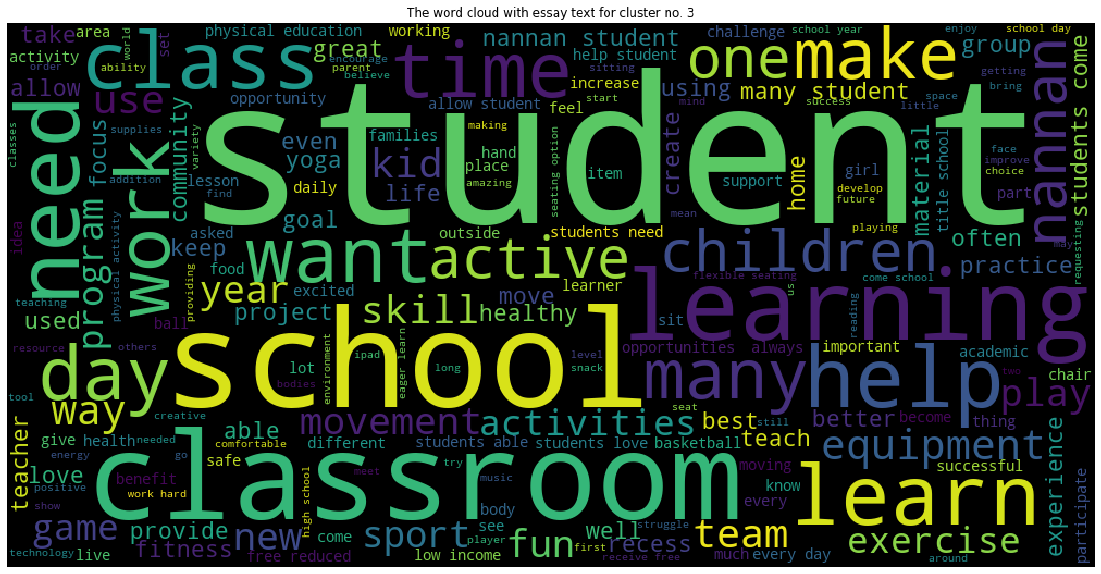

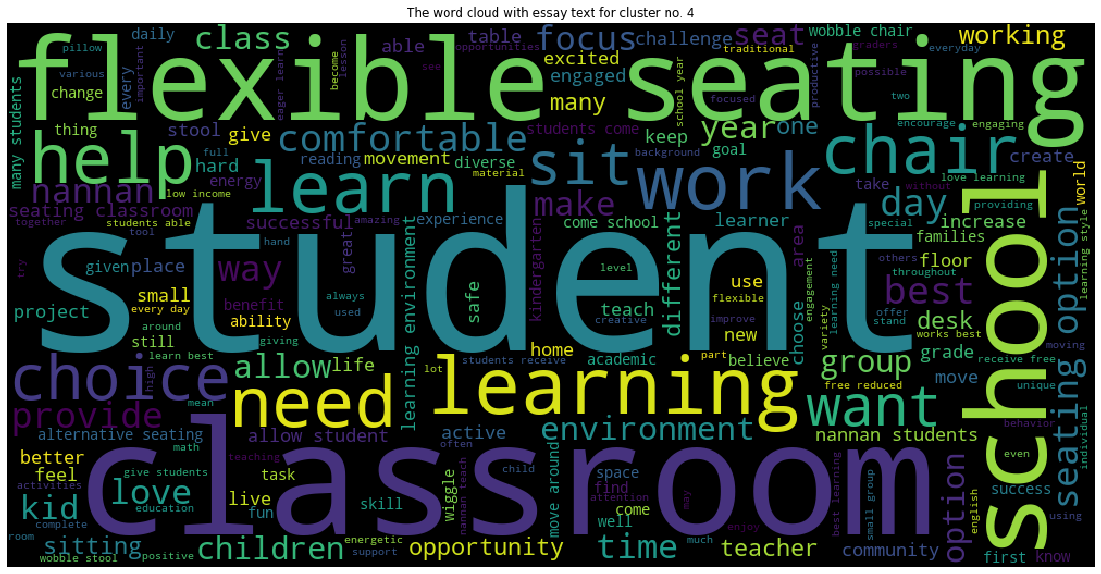

In [183]:
agg_custer_essay = generate_word_cloud(X[:5000],aggcluster.labels_)

**Obervations**

In [184]:
print_obervations(agg_custer_essay)

+------------+-------------------------+--------------------------------------------------------------------------+
| Cluster No | No. of words in cluster |                           Most frequent words                            |
+------------+-------------------------+--------------------------------------------------------------------------+
|     0      |          346281         |  students,school,classroom,learning,reading,help,learn,many,not,nannan   |
|     1      |          73950          | students,school,learning,classroom,technology,learn,help,use,many,nannan |
|     2      |          214527         | students,school,learning,classroom,learn,help,many,nannan,use,technology |
|     3      |          67749          |    students,school,classroom,learning,help,not,day,learn,many,nannan     |
|     4      |          18006          | students,classroom,seating,learning,school,flexible,learn,work,sit,best  |
+------------+-------------------------+--------------------------------

<h1>Applying DBSCAN </h1>

In [186]:
X_agg.shape

(5000, 701)

In [198]:
from sklearn.neighbors import KDTree

algo_title = 'DBSCAN Clustering'
# https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#48558030
minPts = 8
'''
1. build a k-d tree from the given data to facilitate NN query in log time.

2. for each point in the dataset compute its distance from the minPts nearest neighbour

3. choose the largest value of distance from the NN for each point and append in a list

4. sort the distances in the list and plot them

5. epsilon corresponds to the critical change in the curve.

'''
tree = KDTree(X_agg)

epss = []
for xi in tqdm(X_agg):
    epss.append(tree.query(xi, return_distance=True, k=minPts)[0][0][-1])
epss.sort()

100%|██████████| 5000/5000 [00:42<00:00, 118.93it/s]


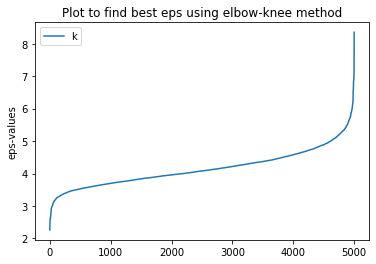

In [197]:
plt.plot(range(0,5000), epss)
plt.title("Plot to find best eps using elbow-knee method")
plt.ylabel('eps-values')
plt.legend('knee-curve')

**Choosing the value of eps = 5 by oberving the above plot**

In [199]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps=5, min_samples=minPts).fit(X_agg)

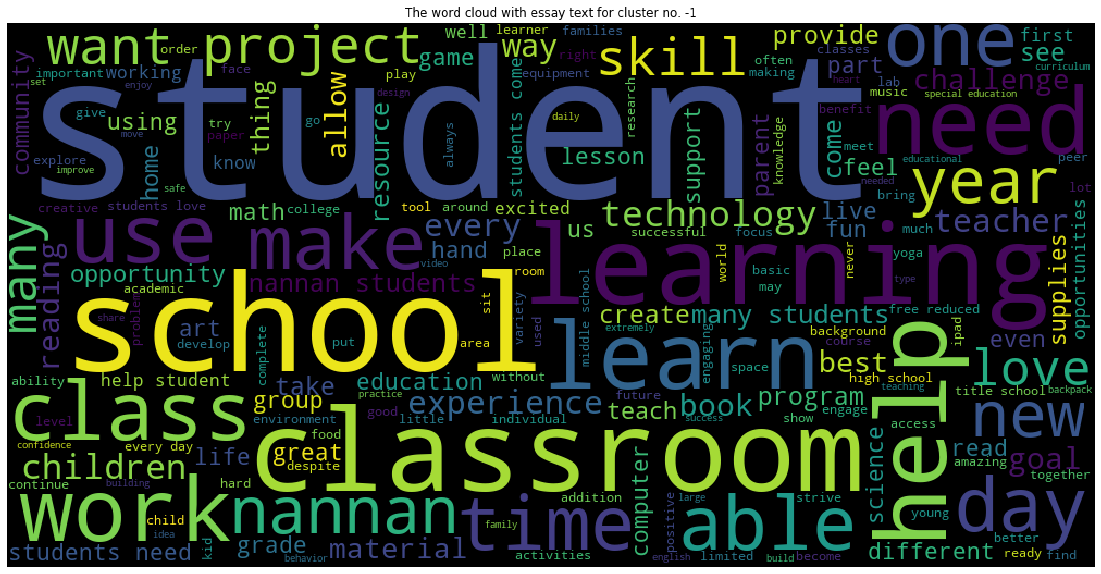

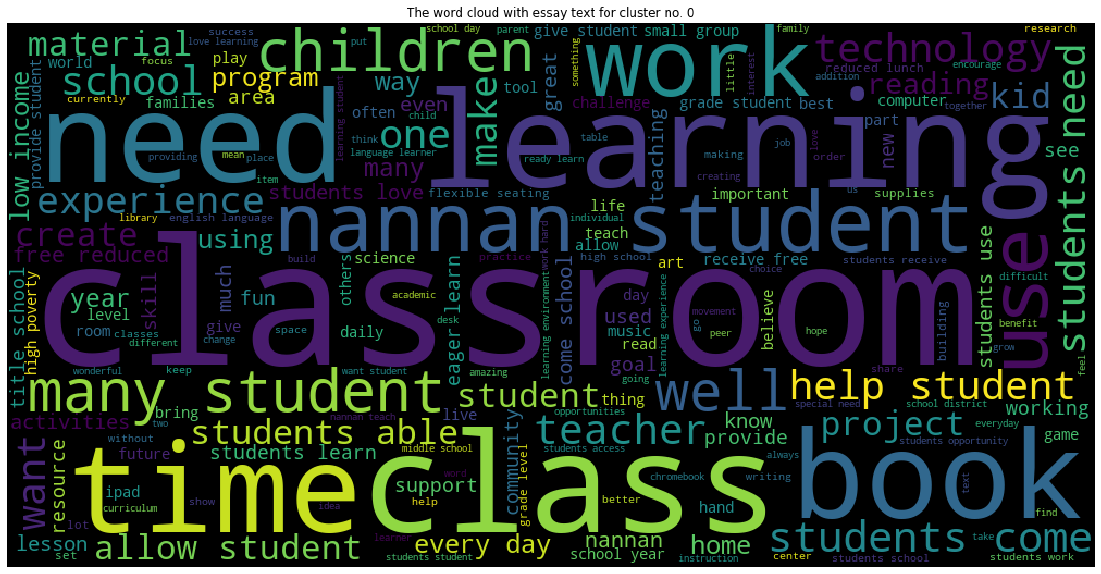

In [202]:
dbsc_essays = generate_word_cloud(X[:5000],dbsc.labels_)

**Observations**

In [203]:
print_obervations(dbsc_essays)

+------------+-------------------------+--------------------------------------------------------------------+
| Cluster No | No. of words in cluster |                        Most frequent words                         |
+------------+-------------------------+--------------------------------------------------------------------+
|     -1     |          18495          | students,school,learning,classroom,not,help,nannan,learn,many,need |
|     0      |          702018         | students,school,learning,classroom,learn,help,many,nannan,not,need |
+------------+-------------------------+--------------------------------------------------------------------+
